<a href="https://colab.research.google.com/github/mdaugherity/Numerical2022/blob/main/roots/Week_4_Root_Finding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ROOT FINDING Examples
## PHYS 351, Fall 2022
##  Dr. Daugherity, Abilene Christian University
Solving NON-linear equations.  For any equation you can subtract the right side from the left side and finding the x that makes it zero.   

*Example*:  Instead of $x^2=4$ find $x$ that makes $x^2-4=0$

This notebook demonstrates 3 common algorithms for root finding, then shows the built-in method using scipy.root_scalar



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Define a function to find roots for:

 $f(x)=0$
   

In [ ]:
def f(x):
  return 5-x  # a difficult equation, the solution is x=5 

## Bisection version 1 - simple loop

In [62]:
xl = 1
xr = 10
fl = f(xl)
fr = f(xr)

STEPS = 20
print(f"{'i':3}{'left':20}{'mid':20}{'right':20}")
for i in range(STEPS):
  xm = (xl+xr)/2
  fm = f(xm)
  print(f"{i:<3}{xl:<20}{xm:<20}{xr:<20}")
  if fl*fm<0:  # left and mid have diff signs
    xr = xm  # root between xl and xm
    fr = fm
  else:
    xl = xm  # root between xm and xr
    fl = fm  
  
print('root is between:',xl,' and ', xr)

i  left                mid                 right               
0  1                   5.5                 10                  
1  1                   3.25                5.5                 
2  1                   2.125               3.25                
3  1                   1.5625              2.125               
4  1.5625              1.84375             2.125               
5  1.84375             1.984375            2.125               
6  1.984375            2.0546875           2.125               
7  1.984375            2.01953125          2.0546875           
8  1.984375            2.001953125         2.01953125          
9  1.984375            1.9931640625        2.001953125         
10 1.9931640625        1.99755859375       2.001953125         
11 1.99755859375       1.999755859375      2.001953125         
12 1.999755859375      2.0008544921875     2.001953125         
13 1.999755859375      2.00030517578125    2.0008544921875     
14 1.999755859375      2.000030517578125

## VERSION 2 - Define max error tolerance

Notice that machine precision means we can't get errors smaller than $10^{-15}$ reliably.   

In [66]:
xl = 1
xr = 10
fl = f(xl)
fr = f(xr)
err = xr-xl
tol = 1e-10  # max error goal
print(f"{'err':^20}{'left':^20}{'mid':^20}{'right':^20}")
while err>tol:
  xm = (xl+xr)/2
  fm = f(xm)
  
  if fl*fm<0:  # left and mid have diff signs
    xr = xm  # root between xl and xm
    fr = fm
  else:
    xl = xm  # root between xm and xr
    fl = fm  
  err = xr-xl
  print(f"{err:20}{xl:20}{xm:20}{xr:20}")
  
print('root is between:',xl,' and ', xr)


        err                 left                mid                right        
                 4.5                   1                 5.5                 5.5
                2.25                   1                3.25                3.25
               1.125                   1               2.125               2.125
              0.5625              1.5625              1.5625               2.125
             0.28125             1.84375             1.84375               2.125
            0.140625            1.984375            1.984375               2.125
           0.0703125            1.984375           2.0546875           2.0546875
          0.03515625            1.984375          2.01953125          2.01953125
         0.017578125            1.984375         2.001953125         2.001953125
        0.0087890625        1.9931640625        1.9931640625         2.001953125
       0.00439453125       1.99755859375       1.99755859375         2.001953125
      0.002197265625      1.

# Newton-Rhapson
Example of root finding using the Newton-Raphson.  This algorithm converges faster than bisection, but it requires knowing the derivative and is **not** guaranteed to converge

In [68]:
def f(x):
  return x**2 + 4*x + 4

In [69]:
def fprime(x):
  return 2*x+4

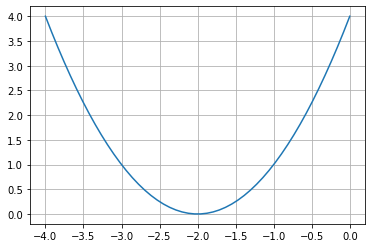

In [ ]:
x = np.linspace(-4,0)
plt.plot(x, f(x))
plt.grid()

In [70]:
# ONE STEP
xold = -3
xnew = xold - f(xold)/fprime(xold)

print('Initial Guess = ',xold)
print('next guess is xnew =', xnew)

Initial Guess =  -3
next guess is xnew = -2.5


In [71]:
# MANY STEPS
STEPS = 10
xold = -3
print('Initial Guess = ',xold)

for i in range(STEPS):
  xnew = xold - f(xold)/fprime(xold)
  print('next guess is xnew =', xnew)
  xold = xnew

Initial Guess =  -3
next guess is xnew = -2.5
next guess is xnew = -2.25
next guess is xnew = -2.125
next guess is xnew = -2.0625
next guess is xnew = -2.03125
next guess is xnew = -2.015625
next guess is xnew = -2.0078125
next guess is xnew = -2.00390625
next guess is xnew = -2.001953125
next guess is xnew = -2.0009765625


# SECANT METHOD

In [ ]:
x0 = -3
x1 = x0 + 1e-3

STEPS = 10
print('Initial Guesses = ',x0,x1)

for i in range(STEPS):
  dem = f(x1)-f(x0)
  x2 = x1 - f(x1)*(x1-x0)/dem
  print('next guess is x2 =', x2)
  x0 = x1
  x1 = x2
  


Initial Guesses =  -3 -2.999
next guess is x2 = -2.4997498749374336
next guess is x2 = -2.3331110370123223
next guess is x2 = -2.1998799519807806
next guess is x2 = -2.1249218456921293
next guess is x2 = -2.076875721431314
next guess is x2 = -2.0475895579268237
next guess is x2 = -2.029393591667401
next guess is x2 = -2.018170574219251
next guess is x2 = -2.0112290088348472
next guess is x2 = -2.006940150752016


# ROOT_SCALAR
How to use root_scalar
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html 


In [ ]:
from scipy.optimize import root_scalar

In [73]:
def f(x):
  return x**2 - 4

In [74]:
def fprime(x):
  return 2*x

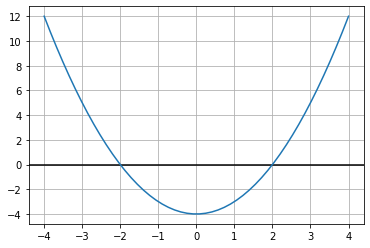

In [75]:
x = np.linspace(-4,4)
plt.axhline(0,color='k')
plt.plot(x,f(x))
plt.grid()

In [76]:
root_scalar(f, bracket=[-4, 0] )    # use brackets

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: -2.0

In [77]:
sol = root_scalar(f, bracket=[0, 10] )    # use brackets
x = sol.root  # the root
print(x)

2.0


In [78]:
root_scalar(f, fprime=fprime, x0=-4 )    # use derivatives

      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 6
           root: -2.0

In [79]:
root_scalar(f, fprime=fprime, x0=0 )    # use derivatives, watch for zeros!!!!!

/usr/local/lib/python3.7/dist-packages/scipy/optimize/zeros.py:295: RuntimeWarning: Derivative was zero.
  warnings.warn(msg, RuntimeWarning)


      converged: False
           flag: 'convergence error'
 function_calls: 2
     iterations: 1
           root: 0.0

In [83]:
sol = root_scalar(f, fprime=fprime, x0=0 )    # use derivatives
x = sol.root
print('root = ',x)
if sol.converged==False:
  print('*****************WARNING!!!!!!***********')
print(sol)

root =  0.0
*****************WARNING!!!!!!***********
      converged: False
           flag: 'convergence error'
 function_calls: 2
     iterations: 1
           root: 0.0


/usr/local/lib/python3.7/dist-packages/scipy/optimize/zeros.py:295: RuntimeWarning: Derivative was zero.
  warnings.warn(msg, RuntimeWarning)


In [84]:
root_scalar(f,x0=-4, x1=-2.5 )    # use two guesses

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: -2.000000000000058

In [86]:
x0 = -4 # initial guess
root_scalar(f,x0=x0, x1=x0+1e-4)    # use two guesses

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: -2.0000000000000004

In [ ]:
x0 = -4 # initial guess
root_scalar(f,x0=x0, x1=x0+1e-4,xtol=1e-4)    # use two guesses

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: -2.000000000382294